In [1]:
from gio_model import GioModel
from math import sqrt
from time import sleep, time

import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

Turn off auto scrolling

In [2]:
%%javascript
require(
        ["notebook/js/outputarea"],
        function (oa) {
            oa.OutputArea.auto_scroll_threshold = -1;
        });

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import tensorflow as tf

tf.InteractiveSession()

ROOT_DIR = '/Users/abel/data'

def get_model(game_id):
    return GioModel.fromFile(ROOT_DIR + '/gio/models/%s.giomodel.gz' % (game_id))

models = os.listdir(ROOT_DIR + '/gio/models')
game_ids = map(lambda x: x[:x.find('.')], models)

In [5]:
model = get_model(game_ids[10])

print 'http://generals.io/replays/' + model.id

print model.ranks

http://generals.io/replays/B5-EAph8l
[7, 5, 3, 4, 0, 2, 6, 1]


In [6]:
model = get_model(game_ids[10])

print model.board_[0, 4, 1]
print model.isVisible(881, 4, 1, 7)

[ 1.  5.  4.]
True


In [7]:
owner_ch = model.board_[:, :, :, 1]
owner_ch[owner_ch == 1] = -2
owner_ch[owner_ch == 0] = 1
owner_ch[owner_ch == -2] = 0

Visualize channels for a random game:

http://generals.io/replays/S9ASLKxwl
[1, 0]


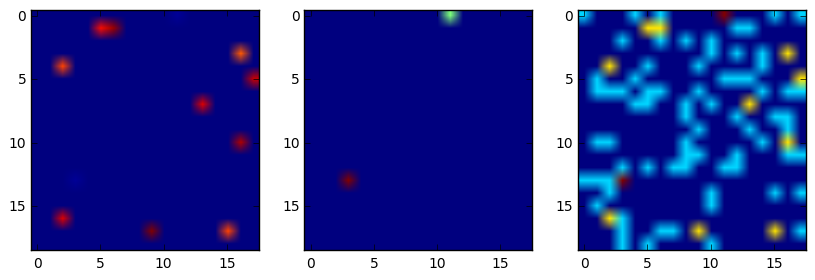

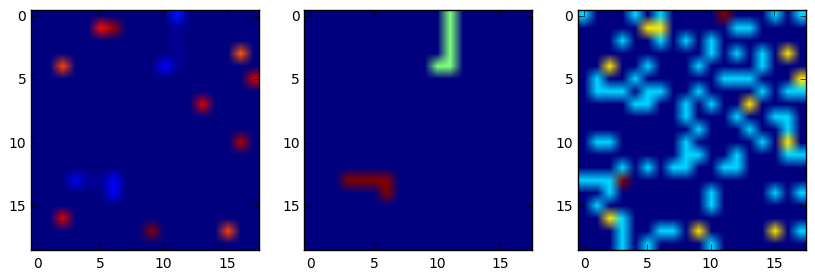

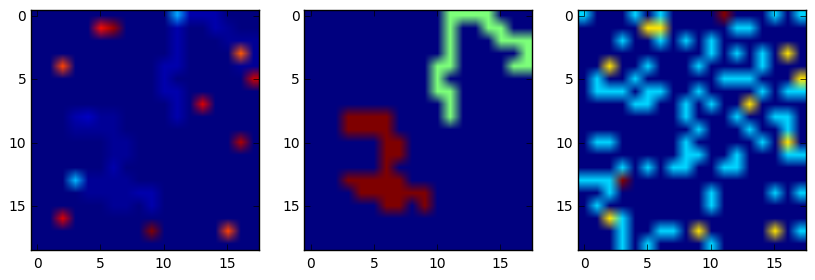

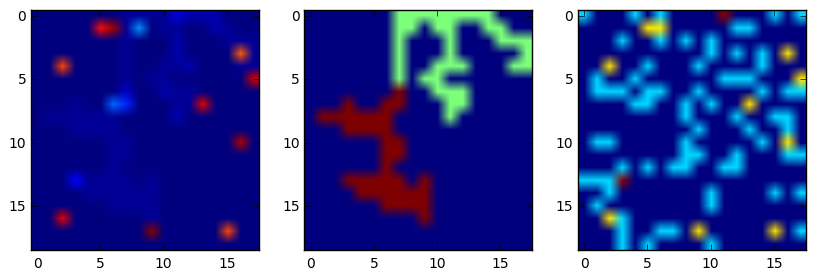

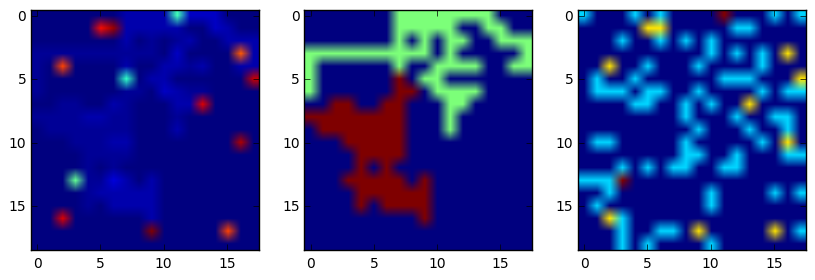

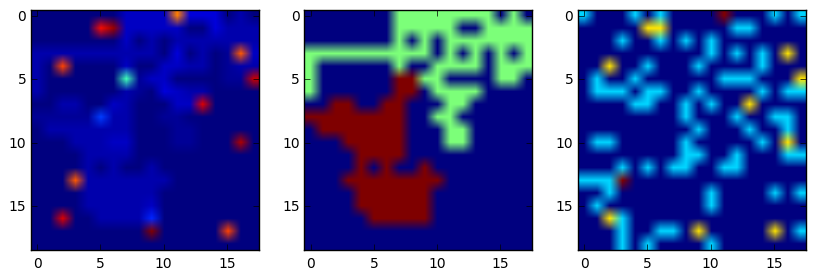

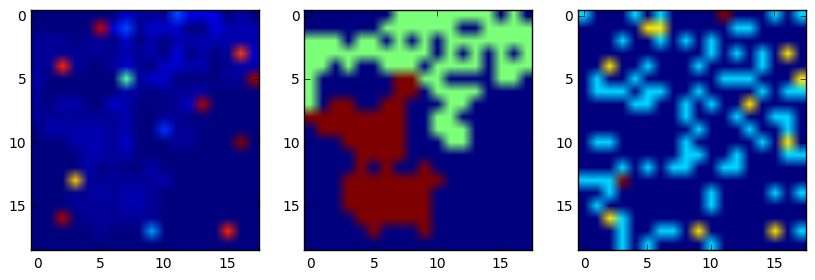

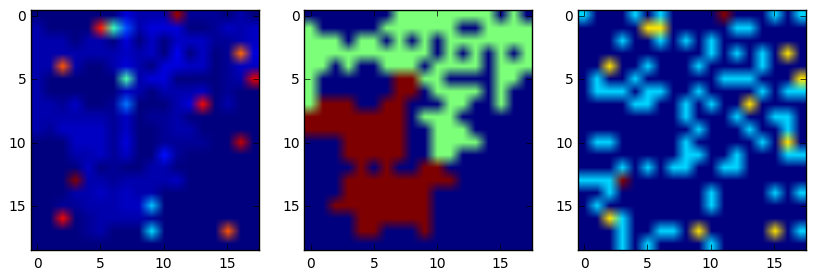

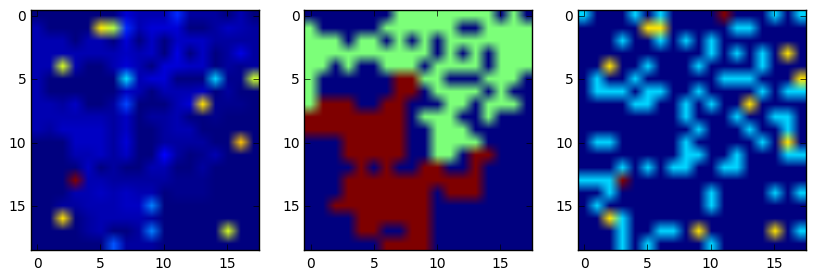

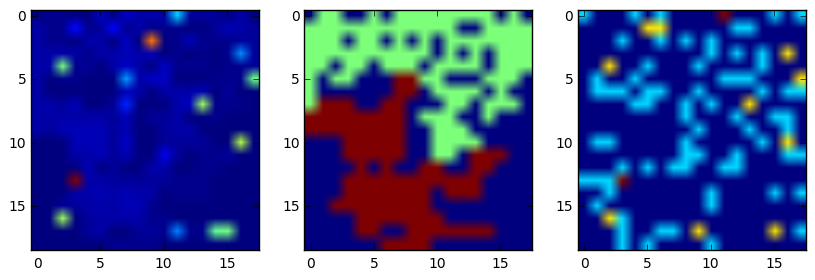

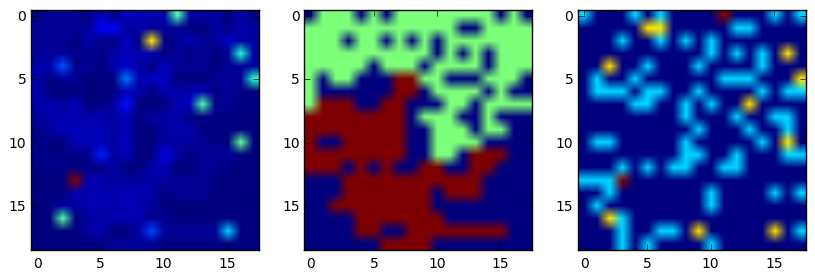

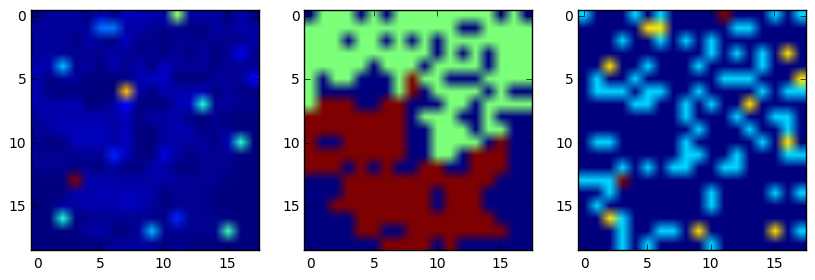

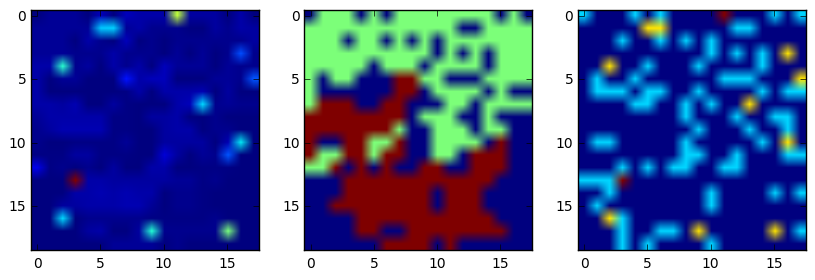

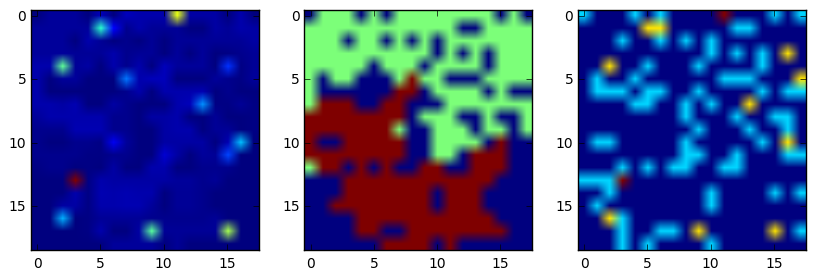

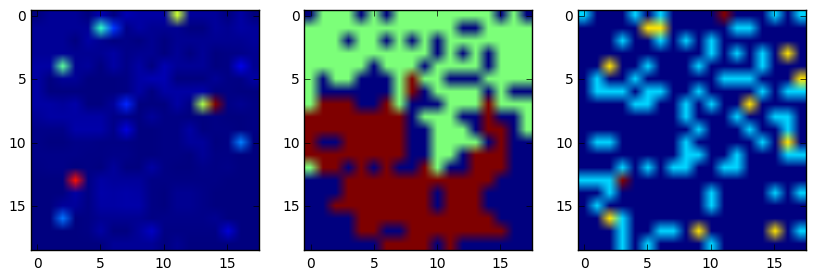

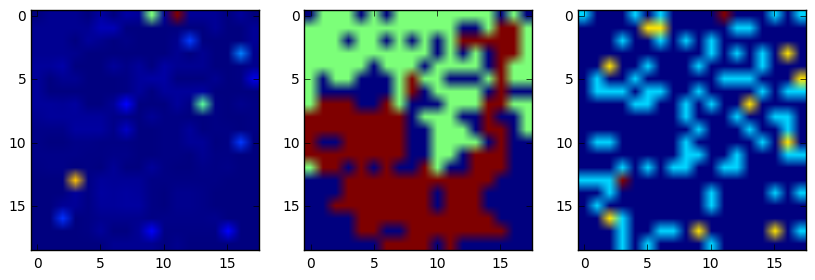

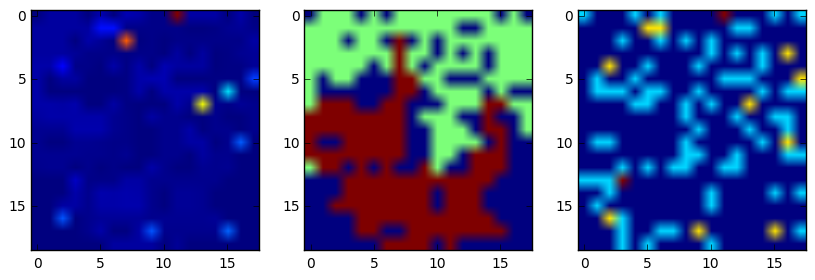

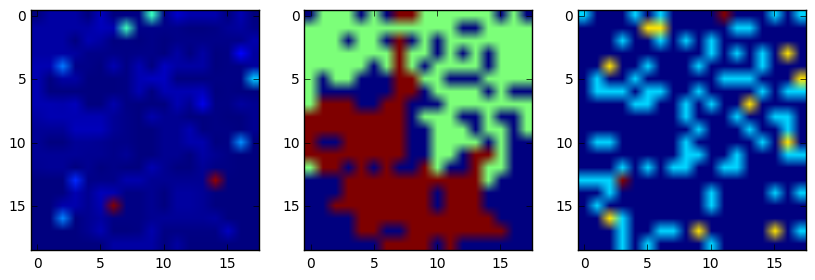

In [14]:
model = get_model(np.random.choice(game_ids, 1)[0])

def visualize_game(model, res=32, view=None):
    print 'http://generals.io/replays/' + model.id
    print model.ranks
    board = model.getBoardView(view) if view is not None else model.board_

    for i in range(board.shape[0] / res):
        turn = i * res
        fig, axs = plt.subplots(1, 3, figsize=(10, 10))
        for i in range(3):
            axs[i].imshow(board[turn][:, :, i])

visualize_game(model)

Visualize game from player-index 0's perspective:

http://generals.io/replays/S9ASLKxwl
[1, 0]


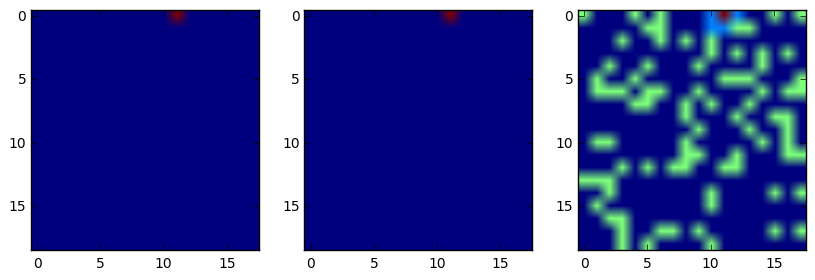

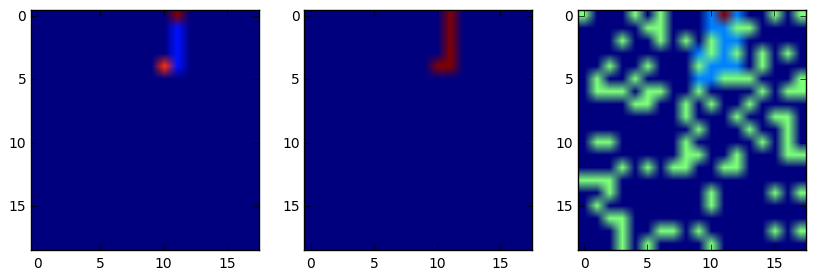

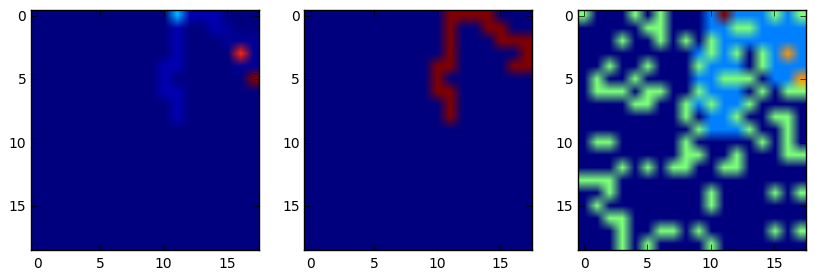

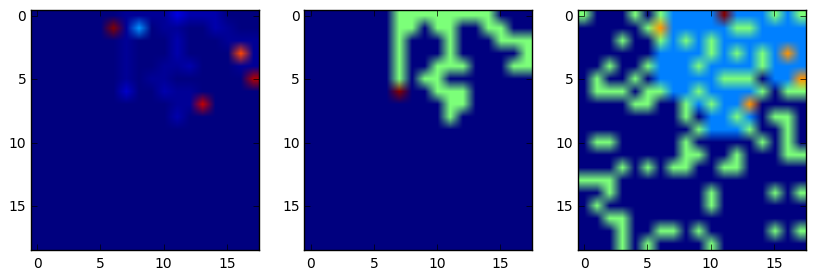

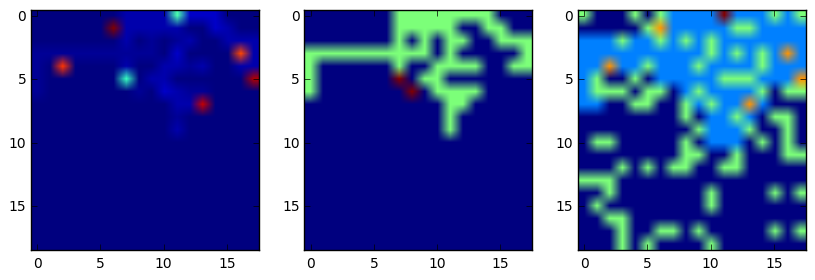

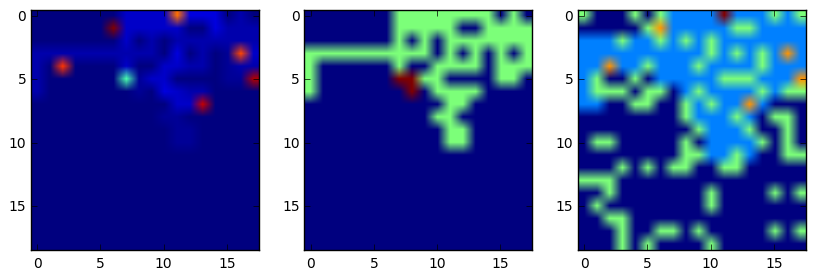

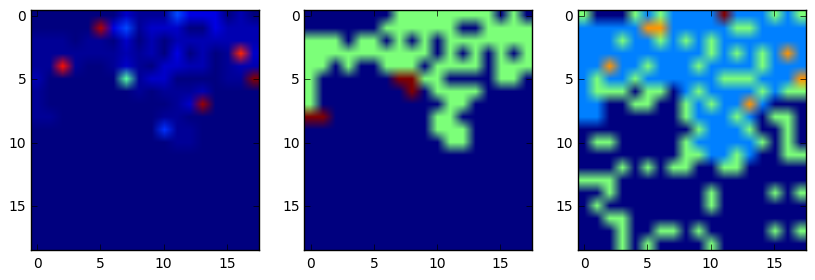

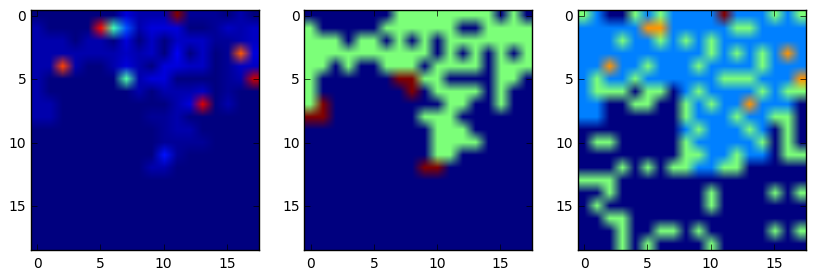

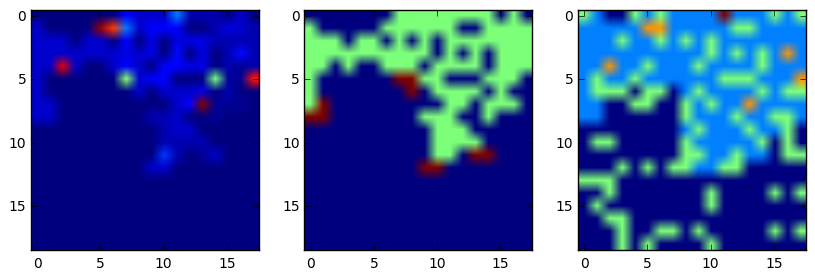

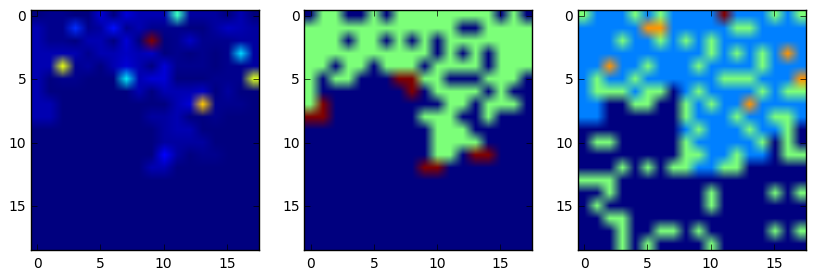

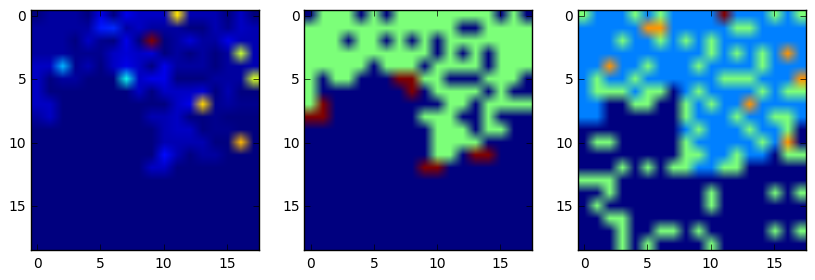

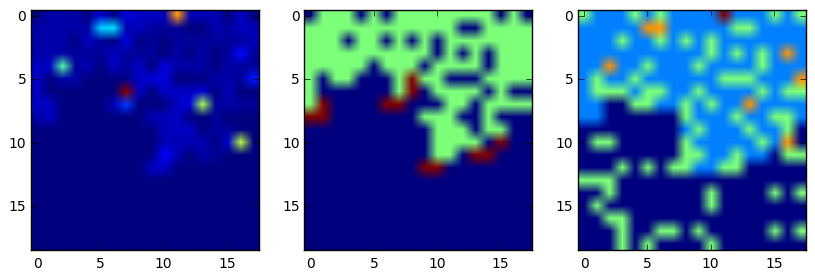

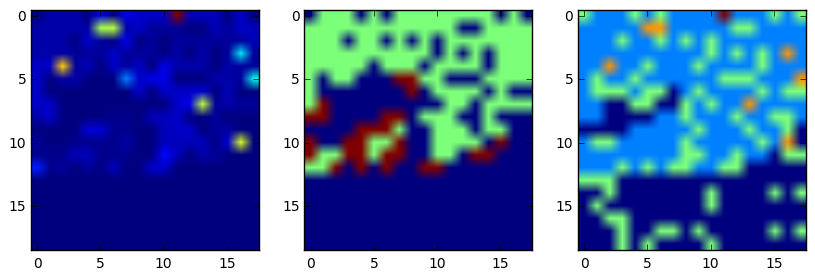

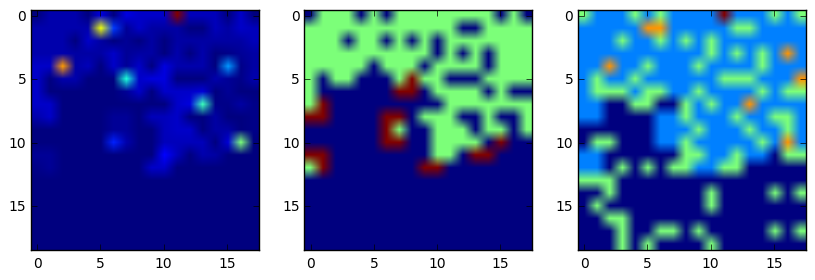

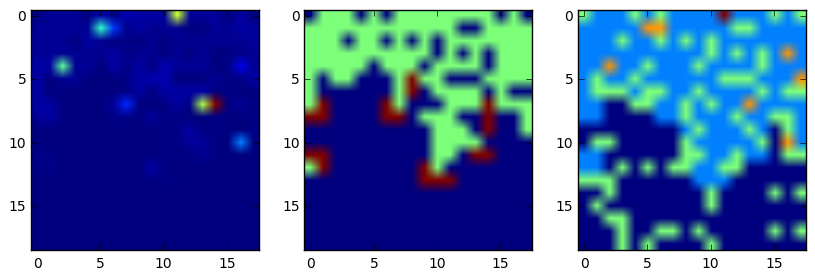

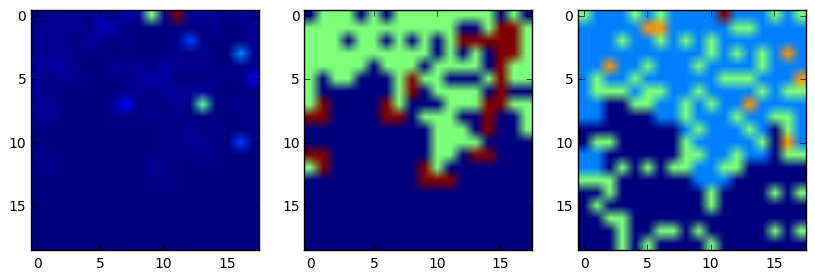

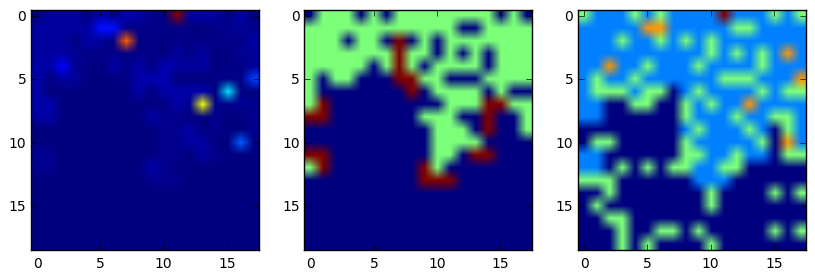

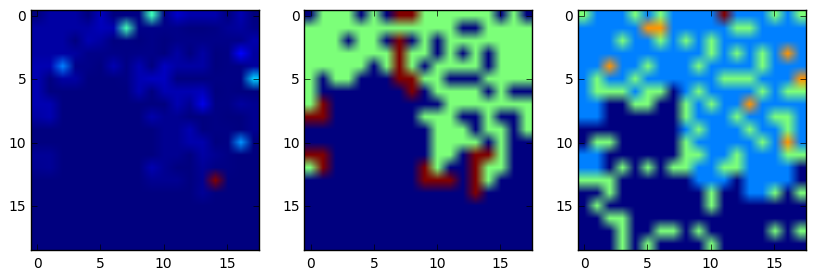

In [15]:
visualize_game(model, view=0)

In [8]:
record_iterator = tf.python_io.tf_record_iterator(path=ROOT_DIR + '/gio/examples/test.tfrecords')

In [9]:
string_record = record_iterator.next()

In [12]:
example = tf.train.Example()
example.ParseFromString(string_record)

In [17]:
example.features.feature['label']

int64_list {
  value: 0
  value: 0
  value: 0
  value: 0
  value: 1
  value: 0
  value: 0
  value: 0
}

In [20]:
example.features.feature['height']

int64_list {
  value: 23
}

In [8]:
# reader = tf.TFRecordReader()
# queue = tf.train.string_input_producer([ROOT_DIR + '/gio/examples/test.tfrecords'])
# _, serialized_example = reader.read(queue)

In [10]:
# example = tf.parse_single_example(serialized_example,
#                         features={
#                           'width': tf.FixedLenFeature([], tf.int64),
#                           'height': tf.FixedLenFeature([], tf.int64),
#                           'num_players': tf.FixedLenFeature([], tf.int64),
#                           'board': tf.FixedLenFeature([], tf.int64),
#                           'army_count': tf.FixedLenFeature([], tf.float32),
#                           'fort_count': tf.FixedLenFeature([], tf.float32),
#                           'label': tf.FixedLenFeature([], tf.int64),
#                         })